<a href="https://colab.research.google.com/github/surekavin/Customer-Conversion/blob/main/conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/train (1).csv")

In [3]:
df.shape

(45211, 11)

In [4]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
df["age"].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [6]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [7]:
df["education_qual"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [8]:
df["call_type"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [9]:
df["day"].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [10]:
df["mon"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [11]:
df["dur"].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [12]:
df["num_calls"].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [13]:
df["prev_outcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [14]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [15]:
df["job"]=df["job"].replace("unknown",np.nan)

In [16]:
df["education_qual"]=df["education_qual"].replace("unknown",np.nan)

In [17]:
#df["call_type"]=df["call_type"].replace("unknown",np.nan)

In [18]:
#df["prev_outcome"]=df["prev_outcome"].replace("unknown",np.nan)

In [19]:
df["education_qual"]=df["education_qual"].fillna("secondary")

In [20]:
#df.dropna(subset=["prev_outcome"],inplace=True)

In [21]:
df.dropna(subset=["job"],inplace=True)

In [22]:
#df.dropna(subset=["call_type"],inplace=True)

In [23]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [24]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [25]:
df.describe()

,age,day,dur,num_calls
count,44923.000000,44923.000000,44923.000000,44923.000000
mean,40.893529,15.813882,258.294838,2.760345
std,10.604399,8.320040,257.713770,3.092838
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


it's often a good idea to detect and correct the outliers

In [26]:
IQR=df["dur"].quantile(0.75)-df["dur"].quantile(0.25)
UL=df.dur.quantile(0.75)+(1.5*IQR)
LL=df.dur.quantile(0.25)-(1.5*IQR)
UL,LL

(643.0, -221.0)

In [27]:
df.dur=df.dur.clip(LL,UL)

In [28]:
IQR=df["num_calls"].quantile(0.75)-df["num_calls"].quantile(0.25)
UL=df.num_calls.quantile(0.75)+(1.5*IQR)
LL=df.num_calls.quantile(0.25)-(1.5*IQR)
UL,LL

(6.0, -2.0)

In [29]:
df.num_calls=df.num_calls.clip(LL,UL)

In [30]:
df.describe()

,age,day,dur,num_calls
count,44923.000000,44923.000000,44923.000000,44923.000000
mean,40.893529,15.813882,235.019856,2.390535
std,10.604399,8.320040,176.751978,1.598581
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,643.000000,6.000000


In [31]:
df.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no
5,35,management,married,tertiary,unknown,5,may,139.0,1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643.0,3.0,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456.0,2.0,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,643.0,5.0,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508.0,4.0,unknown,no


In [32]:
df.shape

(44923, 11)

In [33]:
df["target"]=df["y"].map({"yes":1,"no":0})

In [34]:
df.groupby("prev_outcome")["target"].mean()

prev_outcome
failure    0.125384
other      0.166485
success    0.646000
unknown    0.091761
Name: target, dtype: float64

In [35]:
df.groupby("prev_outcome")["target"].mean()

prev_outcome
failure    0.125384
other      0.166485
success    0.646000
unknown    0.091761
Name: target, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44923 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             44923 non-null  int64  
 1   job             44923 non-null  object 
 2   marital         44923 non-null  object 
 3   education_qual  44923 non-null  object 
 4   call_type       44923 non-null  object 
 5   day             44923 non-null  int64  
 6   mon             44923 non-null  object 
 7   dur             44923 non-null  float64
 8   num_calls       44923 non-null  float64
 9   prev_outcome    44923 non-null  object 
 10  y               44923 non-null  object 
 11  target          44923 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


EDA

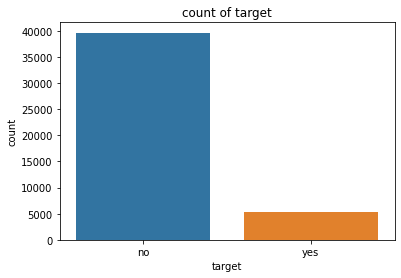

In [37]:
sns.countplot(x=df.y,data=df)  #To visualize Target Distribution
plt.xlabel("target")
plt.title("count of target")
plt.show()

<Axes: ylabel='job'>

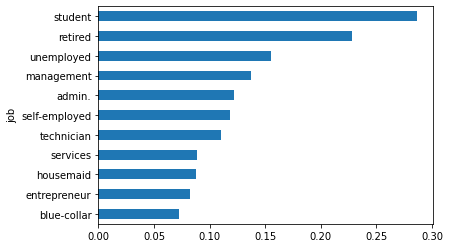

In [38]:
df.groupby("job")["target"].mean().sort_values().plot(kind="barh") #to know who has most number of conversion

<Axes: ylabel='education_qual'>

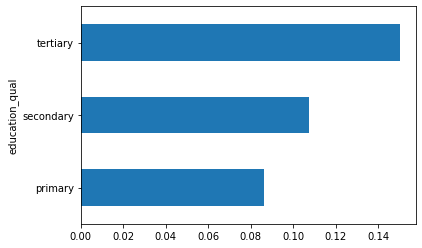

In [39]:
df.groupby("education_qual")["target"].mean().sort_values().plot(kind="barh") #There are 3 Thypes of Education qualification

<Axes: ylabel='call_type'>

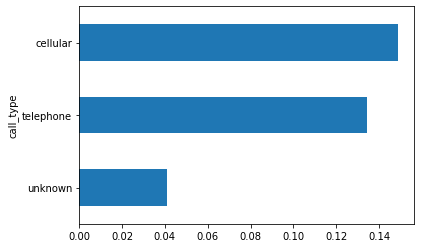

In [40]:
df.groupby("call_type")["target"].mean().sort_values().plot(kind="barh") #most calls done by cellular

<Axes: ylabel='prev_outcome'>

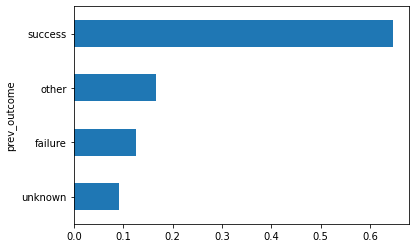

In [41]:
df.groupby("prev_outcome")["target"].mean().sort_values().plot(kind="barh") #previous outcome has most success rate

<Axes: ylabel='mon'>

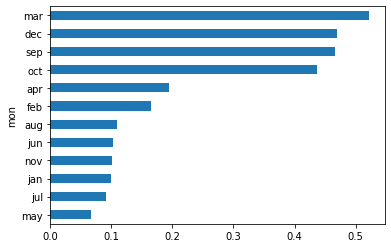

In [42]:
df.groupby("mon")["target"].mean().sort_values().plot(kind="barh") #in the march month many has bought policies

<Axes: ylabel='marital'>

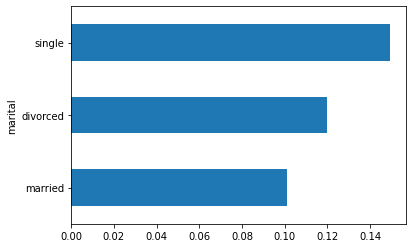

In [43]:
df.groupby("marital")["target"].mean().sort_values().plot(kind="barh") #Single can buy more policies

<Axes: xlabel='y', ylabel='age'>

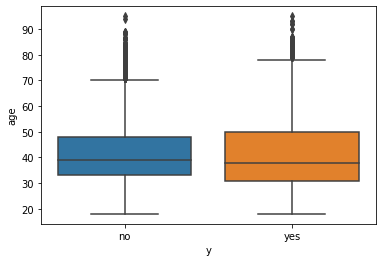

In [44]:
sns.boxplot(x="y",y="age",data=df)

<Axes: xlabel='y', ylabel='day'>

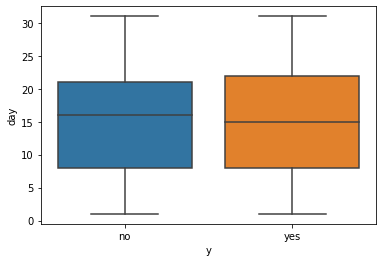

In [45]:
sns.boxplot(x="y",y="day",data=df)

<Axes: xlabel='y', ylabel='dur'>

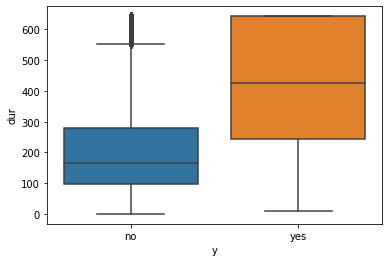

In [46]:
sns.boxplot(x="y",y="dur",data=df)

<Axes: xlabel='y', ylabel='num_calls'>

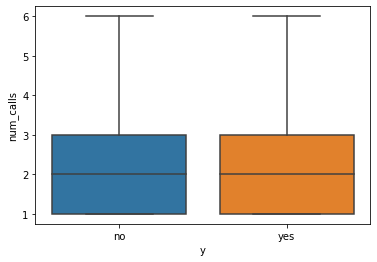

In [47]:
sns.boxplot(x="y",y="num_calls",data=df)

In [48]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0
5,35,management,married,tertiary,unknown,5,may,139.0,1.0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643.0,3.0,unknown,yes,1
45207,71,retired,divorced,primary,cellular,17,nov,456.0,2.0,unknown,yes,1
45208,72,retired,married,secondary,cellular,17,nov,643.0,5.0,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508.0,4.0,unknown,no,0


In [49]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import imblearn

DATA ENCODING

In [51]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import category_encoders as ce

In [53]:
col=df["job"].unique()
P=[]
for i in col:
  p=len(df[df["job"]==i][df["y"]=="yes"])/len(df[df["job"]==i])
  P.append(p)
dff=pd.DataFrame({"job":col,"%":P})
dff=dff.sort_values("%",ascending=True) 
dff=dff.reset_index()
del dff["index"] 


<ipython-input-53-294d66de4603>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p=len(df[df["job"]==i][df["y"]=="yes"])/len(df[df["job"]==i])


In [54]:
dff

,job,%
0,blue-collar,0.072750
1,entrepreneur,0.082717
2,housemaid,0.087903
3,services,0.088830
4,technician,0.110570
5,self-employed,0.118429
6,admin.,0.122027
7,management,0.137556
8,unemployed,0.155027
9,retired,0.227915


In [55]:
df["job"]=df["job"].map({dff["job"][0]:0,dff["job"][1]:1,dff["job"][2]:2,dff["job"][3]:3,dff["job"][4]:4,dff["job"][5]:5,dff["job"][6]:6,dff["job"][7]:7,dff["job"][8]:8,dff["job"][9]:9,dff["job"][10]:10})

In [56]:
col=df["marital"].unique()
P=[]
for i in col:
  p=len(df[df["marital"]==i][df["y"]=="yes"])/len(df[df["marital"]==i])
  P.append(p)
dff=pd.DataFrame({"marital":col,"%":P})
dff=dff.sort_values("%",ascending=True) 
dff=dff.reset_index()
del dff["index"] 


<ipython-input-56-86167c68b29b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p=len(df[df["marital"]==i][df["y"]=="yes"])/len(df[df["marital"]==i])


In [57]:
dff

,marital,%
0,married,0.101218
1,divorced,0.119653
2,single,0.149348


In [58]:
df["marital"]=df["marital"].map({dff["marital"][0]:0,dff["marital"][1]:1,dff["marital"][2]:2})

In [59]:
col=df["education_qual"].unique()
P=[]
for i in col:
  p=len(df[df["education_qual"]==i][df["y"]=="yes"])/len(df[df["education_qual"]==i])
  P.append(p)
dff=pd.DataFrame({"education_qual":col,"%":P})
dff=dff.sort_values("%",ascending=True) 
dff=dff.reset_index()
del dff["index"] 


<ipython-input-59-26747cece248>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p=len(df[df["education_qual"]==i][df["y"]=="yes"])/len(df[df["education_qual"]==i])


In [60]:
dff

,education_qual,%
0,primary,0.086471
1,secondary,0.107598
2,tertiary,0.150204


In [61]:
df["education_qual"]=df["education_qual"].map({dff["education_qual"][0]:0,dff["education_qual"][1]:1,dff["education_qual"][2]:2})

In [62]:
col=df["call_type"].unique()
P=[]
for i in col:
  p=len(df[df["call_type"]==i][df["y"]=="yes"])/len(df[df["call_type"]==i])
  P.append(p)
dff=pd.DataFrame({"call_type":col,"%":P})
dff=dff.sort_values("%",ascending=True) 
dff=dff.reset_index()
del dff["index"] 


<ipython-input-62-24962f34d9b3>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p=len(df[df["call_type"]==i][df["y"]=="yes"])/len(df[df["call_type"]==i])


In [63]:
dff

,call_type,%
0,unknown,0.040902
1,telephone,0.134615
2,cellular,0.148933


In [64]:
df["call_type"]=df["call_type"].map({dff["call_type"][0]:0,dff["call_type"][1]:1,dff["call_type"][2]:2})

In [65]:
col=df["mon"].unique()
P=[]
for i in col:
  p=len(df[df["mon"]==i][df["y"]=="yes"])/len(df[df["mon"]==i])
  P.append(p)
dff=pd.DataFrame({"mon":col,"%":P})
dff=dff.sort_values("%",ascending=True) 
dff=dff.reset_index()
del dff["index"] 

<ipython-input-65-3434e10bfd2e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p=len(df[df["mon"]==i][df["y"]=="yes"])/len(df[df["mon"]==i])


In [66]:
dff

,mon,%
0,may,0.067128
1,jul,0.091200
2,jan,0.100144
3,nov,0.101365
4,jun,0.103790
5,aug,0.110446
6,feb,0.165781
7,apr,0.195214
8,oct,0.437414
9,sep,0.466667


In [67]:
df["mon"]=df["mon"].map({dff["mon"][0]:0,dff["mon"][1]:1,dff["mon"][2]:2,dff["mon"][3]:3,dff["mon"][4]:4,dff["mon"][5]:5,dff["mon"][6]:6,dff["mon"][7]:7,dff["mon"][8]:8,dff["mon"][9]:9,dff["mon"][10]:10,dff["mon"][11]:11})

In [68]:
col=df["prev_outcome"].unique()
P=[]
for i in col:
  p=len(df[df["prev_outcome"]==i][df["y"]=="yes"])/len(df[df["prev_outcome"]==i])
  P.append(p)
dff=pd.DataFrame({"prev_outcome":col,"%":P})
dff=dff.sort_values("%",ascending=True) 
dff=dff.reset_index()
del dff["index"]

<ipython-input-68-9ac907be2a9b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p=len(df[df["prev_outcome"]==i][df["y"]=="yes"])/len(df[df["prev_outcome"]==i])


In [69]:
dff

,prev_outcome,%
0,unknown,0.091761
1,failure,0.125384
2,other,0.166485
3,success,0.646000


In [70]:
df["prev_outcome"]=df["prev_outcome"].map({dff["prev_outcome"][0]:0,dff["prev_outcome"][1]:1,dff["prev_outcome"][2]:2,dff["prev_outcome"][3]:3})

In [71]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,2,0,5,0,261.0,1.0,0,no,0
1,44,4,2,1,0,5,0,151.0,1.0,0,no,0
2,33,1,0,1,0,5,0,76.0,1.0,0,no,0
3,47,0,0,1,0,5,0,92.0,1.0,0,no,0
5,35,7,0,2,0,5,0,139.0,1.0,0,no,0


Splitting the Dataset

In [72]:
col=[*df.columns]
col[:-2]

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome']

In [73]:
x=df.loc[:,col[:-2]].values
y=df.loc[:,col[-1]].values

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)

Balance the Dataset

In [75]:
df.shape

(44923, 12)

In [76]:
len(x_train),len(y_train)

(33692, 33692)

In [77]:
from imblearn.combine import SMOTEENN


smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x, y)

In [78]:
len(x_smt),len(y_smt)

(68342, 68342)

In [79]:
df_bal=pd.DataFrame(x_smt, columns=df.columns[:-2])

In [80]:
df_bal['y']=y_smt

In [81]:
len(df_bal[df_bal['y']==1])/len(df_bal)

0.5596558485265284

Model:Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter = 500)

model_LR.fit(x_train, y_train)
print(f'Model:{model_LR.score(x_test, y_test)}')

Model:0.8926186448223666


In [83]:
from sklearn.metrics import roc_auc_score
LR_roc_auc = roc_auc_score(y_test, model_LR.predict_proba(x_test)[:,1])
LR_roc_auc

0.8964929021172394

Model:KNN

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN.score(x_test,y_test)

0.8824681684622919

In [85]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)
KNN.score(x_test, y_test)
KNN=roc_auc_score(y_test, KNN.predict_proba(x_test)[:,1])

In [86]:
KNN

0.749840274408566

In [87]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) 
  knn.fit(x_train,y_train) 
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10, scoring = "roc_auc"))) 

K value  :  1  train score :  0.9999406387272943  cv score :  0.6323832257827633
K value  :  2  train score :  0.9222367327555503  cv score :  0.6954253970173817
K value  :  3  train score :  0.9244924611183664  cv score :  0.7368669817499705
K value  :  4  train score :  0.9088507657604179  cv score :  0.7632498858259489
K value  :  5  train score :  0.9115517036685267  cv score :  0.7814526799989417
K value  :  6  train score :  0.9035082512169061  cv score :  0.793673205194177
K value  :  7  train score :  0.9059717440341921  cv score :  0.8028569835696278
K value  :  8  train score :  0.9004214650362103  cv score :  0.8119963553936642
K value  :  9  train score :  0.9021429419446753  cv score :  0.8184125859815108
K value  :  10  train score :  0.8987296687640983  cv score :  0.8237591186162829
K value  :  20  train score :  0.894811824765523  cv score :  0.8472913671026465
K value  :  50  train score :  0.8903894099489493  cv score :  0.8561142392779253


Model:Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
print(f'Model: {model_tree.score(x_test, y_test)}')

Model: 0.8711601816401033


In [89]:
TR_roc_auc = roc_auc_score(y_test, model_tree.predict_proba(x_test)[:,1])
TR_roc_auc


0.7026882815323274

Model:Random Forest

```
# This is formatted as code
```



In [90]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
model_fore = RandomForestClassifier(n_jobs = -1)
model_fore.fit(x_train, y_train)

print(f'Model: {model_fore.score(x_test, y_test)}')

Model: 0.9022348855845428


In [91]:
RF_roc_auc = roc_auc_score(y_test, model_fore.predict_proba(x_test)[:,1])
RF_roc_auc


0.9243705083896634

Model:XG Boost

In [92]:
import xgboost as xgb
from xgboost import XGBClassifier
model_X = XGBClassifier()
model_X.fit(x_train, y_train)
print(f'Model:{model_X.score(x_test, y_test)}')

Model:0.9024129641171756


In [93]:
XGB_roc_auc = roc_auc_score(y_test, model_X.predict_proba(x_test)[:,1])
XGB_roc_auc


0.9267375187888744

XGBoost Hyper parameter Tuning

In [94]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(x_train,y_train) 
  model.score(x_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.9096224623055919  Cross-Val score :  0.9043393640568175
Learning rate :  0.02  Train score :  0.9112548973049982  Cross-Val score :  0.9044580672266687
Learning rate :  0.03  Train score :  0.9124718033954649  Cross-Val score :  0.9043987640848264
Learning rate :  0.04  Train score :  0.9135403063041672  Cross-Val score :  0.9043690728786553
Learning rate :  0.05  Train score :  0.915291463848985  Cross-Val score :  0.9047845383770511
Learning rate :  0.06  Train score :  0.9166270924848628  Cross-Val score :  0.9051109742961
Learning rate :  0.07  Train score :  0.9186750563932091  Cross-Val score :  0.9050812918977622
Learning rate :  0.08  Train score :  0.9216431200284934  Cross-Val score :  0.9062982526139448
Learning rate :  0.09  Train score :  0.9224148165736673  Cross-Val score :  0.9058530342545448
Learning rate :  0.1  Train score :  0.9234536388460168  Cross-Val score :  0.905496898321491
Learning rate :  0.11  Train score :  0.925739

In [96]:
pd.DataFrame({"Model":["Logistic Regression","KNN","Decision Tree","Random Forest","XG Boost"],"AUROC":["0.8964929021172394","0.749840274408566","0.7026882815323274","0.9243705083896634","0.9267375187888744"]})

,Model,AUROC
0,Logistic Regression,0.8964929021172394
1,KNN,0.749840274408566
2,Decision Tree,0.7026882815323274
3,Random Forest,0.9243705083896634
4,XG Boost,0.9267375187888744
